In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# List of tech stock tickers
tech_stocks = ['AAPL', 'MSFT', 'AMZN', 'NVDA', 'ROKU']

Appletraindf=yf.download('AAPL',start='2014-08-06',end='2019-08-06')
Appletraindf.info()




[*********************100%%**********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2014-08-06 to 2019-08-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [ ]:
Appletestdf=yf.download('AAPL',start='2019-08-06',end='2024-08-06')
Appletestdf.info()

[*********************100%%**********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-08-06 to 2024-08-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [ ]:
Microsofttraindf=yf.download('MSFT',start='2014-08-06',end='2019-08-06')
Microsofttestdf=yf.download('MSFT',start='2019-08-06',end='2024-08-06')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
Amazontraindf=yf.download('AMZN',start='2014-08-06',end='2019-08-06')
Amazontestdf=yf.download('AMZN',start='2019-08-06',end='2024-08-06')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
Nvidiatraindf=yf.download('NVDA',start='2014-08-06',end='2019-08-06')
Nvidiatestdf=yf.download('NVDA',start='2019-08-06',end='2024-08-06')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
Rokutraindf=yf.download('ROKU',start='2014-08-06',end='2019-08-06')
Rokutestdf=yf.download('ROKU',start='2019-08-06',end='2024-08-06')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [ ]:
Appletraindf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-08-06,23.687500,23.870001,23.677500,23.740000,20.974590,154232000
2014-08-07,23.732500,23.987499,23.525000,23.620001,20.972368,186844000
2014-08-08,23.565001,23.705000,23.320000,23.684999,21.030081,167460000
2014-08-11,23.817499,24.020000,23.709999,23.997499,21.307554,146340000
2014-08-12,24.010000,24.219999,23.902500,23.992500,21.303114,135180000


In [ ]:
Appletraindf.drop(["Adj Close"],axis=1,inplace=True)

In [ ]:
Appletraindf.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-08-06,23.687500,23.870001,23.677500,23.740000,154232000
2014-08-07,23.732500,23.987499,23.525000,23.620001,186844000
2014-08-08,23.565001,23.705000,23.320000,23.684999,167460000
2014-08-11,23.817499,24.020000,23.709999,23.997499,146340000
2014-08-12,24.010000,24.219999,23.902500,23.992500,135180000


In [ ]:


Appletraindf.reset_index(inplace=True)
Appletraindf.head()


,Date,Open,High,Low,Close,Volume
0,2014-08-06,23.687500,23.870001,23.677500,23.740000,154232000
1,2014-08-07,23.732500,23.987499,23.525000,23.620001,186844000
2,2014-08-08,23.565001,23.705000,23.320000,23.684999,167460000
3,2014-08-11,23.817499,24.020000,23.709999,23.997499,146340000
4,2014-08-12,24.010000,24.219999,23.902500,23.992500,135180000


In [ ]:
appletrain=Appletraindf.iloc[:,4:5].values
scaler=MinMaxScaler(feature_range=(0,1))
appletrain=scaler.fit_transform(appletrain)
appletrain.shape

(1258, 1)

In [ ]:
X_train= []
Y_train= []
for i in range(60,1258):
    X_train.append(appletrain[i-60:i,0])
    Y_train.append(appletrain[i,0])
X_train,Y_train=np.array(X_train),np.array(Y_train)

In [ ]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1198, 60, 1)

In [ ]:
model= Sequential()

model.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,Y_train,epochs=100,batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 211ms/step - loss: 0.0623
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 195ms/step - loss: 0.0055
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 223ms/step - loss: 0.0042
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 220ms/step - loss: 0.0041
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 184ms/step - loss: 0.0037
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 229ms/step - loss: 0.0035
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 193ms/step - loss: 0.0029
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - loss: 0.0039
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - loss: 0.0031
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 229ms/step - loss: 0.0027
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 185ms/step - loss: 0.0034
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - loss: 0.0026
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 222ms/step - loss: 0.0027
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 180ms/step - loss: 0.0026
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━

In [ ]:
Appletestdf.head()

,Date,Open,High,Low,Close,Volume
0,2019-08-06,49.077499,49.517502,48.509998,49.250000,143299200
1,2019-08-07,48.852501,49.889999,48.455002,49.759998,133457600
2,2019-08-08,50.049999,50.882500,49.847500,50.857498,108038000
3,2019-08-09,50.325001,50.689999,49.822498,50.247501,98478800
4,2019-08-12,49.904999,50.512501,49.787498,50.119999,89927600


In [ ]:

appletest=Appletestdf.iloc[:,4:5].values
y_test=appletest[60:,0:]
inputClosing=appletest[:,0:]
inputClosing_scaled=scaler.transform(inputClosing)
inputClosing_scaled.shape
X_test=[]
length=len(appletest)
for i in range(60,length):
    X_test.append(inputClosing_scaled[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(1198, 60, 1)

In [ ]:
y_pred=model.predict(X_test)
predicted=scaler.inverse_transform(y_pred)

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step


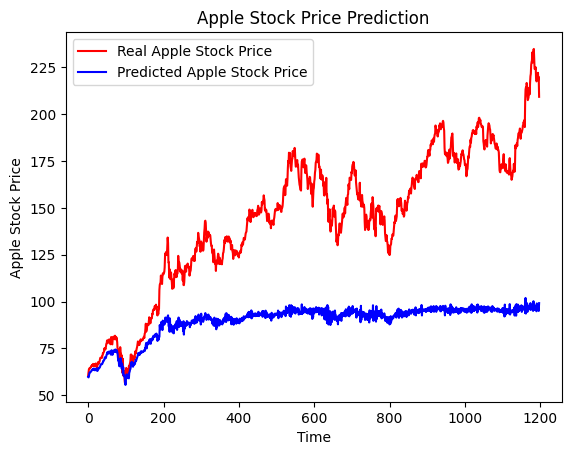

In [ ]:
plt.plot(y_test,color='red',label='Real Apple Stock Price')
plt.plot(predicted,color='blue',label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()